## 1

In [47]:
import numpy as np
x = [477, 844, 964]
y = [0.662, 1.17, 1.33]

In [48]:
import matplotlib.pyplot as plt

In [49]:
def pearson(x, y):
    """
    计算Pearson相关系数
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
    return numerator / denominator

In [50]:
pearson(x[0:3],y[0:3])

0.9999733031893058

In [51]:
slope, intercept = np.polyfit(x, y, 1)

In [52]:
print(slope, '* x + ', intercept)

0.001374604538935116 * x +  0.0070095428444204395


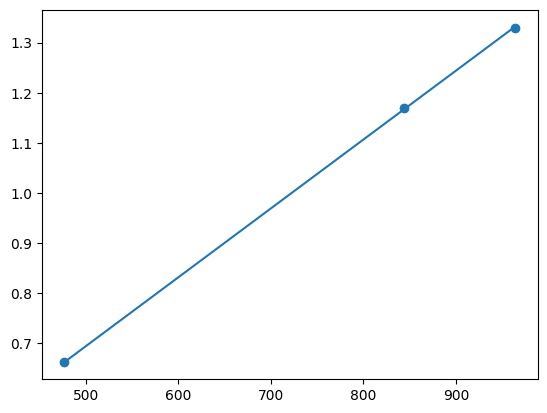

In [53]:
plt.scatter(x,y)
plt.plot(x, slope * np.array(x) + intercept)

In [54]:
theta = [20,40,60,80,100,120]
xx = [440,368,286,227,189,157]
xx = np.array(xx)
xx = slope * xx + intercept

In [55]:
xx

array([0.61183554, 0.51286401, 0.40014644, 0.31904477, 0.2668098 ,
       0.22282246])

(0.0, 140.0)

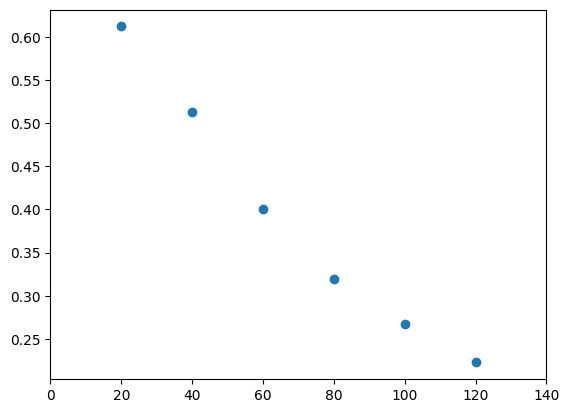

In [56]:
plt.scatter(theta,xx)
plt.xlim(0,140)

In [57]:
yy = [23034-1190,17613-583,13411-537,12142-597,12173-694,13811-928]
yy = np.array(yy)

In [58]:
eta_E = [0.1 , 0.15 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.8 , 1.0]
eta = [1.09*0.001, 1.07*0.001, 1.04*0.001, 9.17*0.0001, 8.11*0.0001, 7.37*0.0001, 6.87*0.0001, 6.17*0.0001, 5.69*0.0001]

In [59]:
import scipy.interpolate as scp

In [60]:
ipo3=scp.splrep(eta_E,eta,k=3) #样本点导入，生成参数
eta_xx=scp.splev(xx,ipo3)

In [61]:
R_E = [0.2,0.3,0.4,0.5,0.6,0.662,0.8,1.0]
R = [0.8841,0.7236,0.5875,0.4912,0.4266,0.3914,0.3373,0.2977]

In [62]:
ipo3=scp.splrep(R_E,R,k=3) #样本点导入，生成参数
R_xx=scp.splev(xx,ipo3)

In [63]:
yy = yy / R_xx / eta_xx

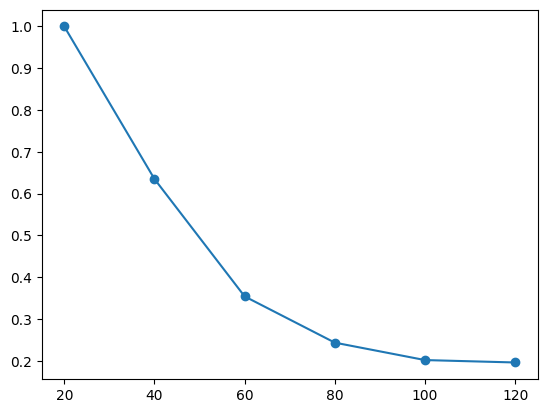

In [64]:
yy = yy / yy[0]
plt.plot(theta,yy)
plt.scatter(theta,yy)

In [65]:
yy

array([1.        , 0.63510491, 0.35417517, 0.24351998, 0.2018321 ,
       0.19607112])

In [66]:
xx*1000

array([611.83553998, 512.86401317, 400.14644098, 319.04477318,
       266.8098007 , 222.82245546])

(0.0, 140.0)

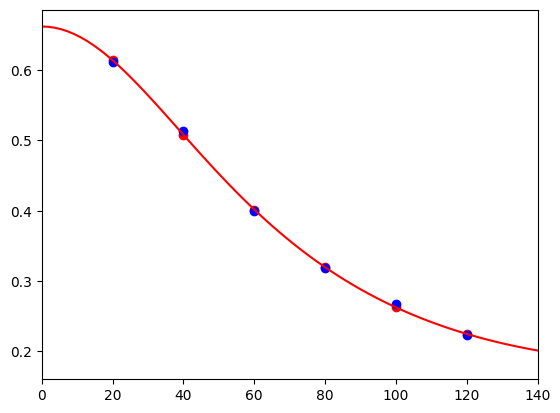

In [67]:
alpha = 0.662/0.511
xtheta = np.linspace(0,180,100)
scatter_energy = 0.662/(1+alpha*(1-np.cos(xtheta/180*np.pi)))
plt.plot(xtheta,scatter_energy, c='r')
plt.scatter(theta, 0.662/(1+alpha*(1-np.cos(np.array(theta)/180*np.pi))),
            c='r')
plt.scatter(theta,xx, c='b')
plt.xlim(0,140)

In [73]:
rel_energy = scatter_energy / 0.662
sigmaomega = rel_energy**2 * (rel_energy + 1.0/rel_energy - np.sin(xtheta/180*np.pi)**2)
sigmaomega = sigmaomega / sigmaomega[11]

(0.0, 140.0)

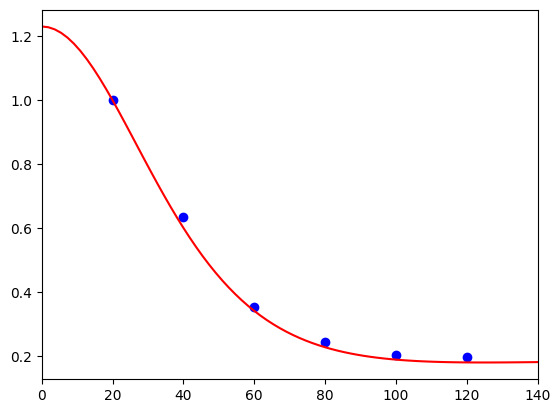

In [75]:
plt.plot(xtheta, sigmaomega, c='r')
plt.scatter(theta,yy, c='b')
plt.xlim(0,140)

## 2

In [68]:
labellist = ['20','40','60','80','100','120'] 
filelist = ['20.dat.txt','40.dat.txt'
            ,'60.dat.txt','80.dat.txt','100.dat.txt','120.dat.txt']
filebendilist = ['20 bendi.dat.txt','60 bendi.dat.txt'
            ,'60 bendi.dat.txt','80 bendi.dat.txt','100 bendi.dat.txt','120 bendi.dat.txt']


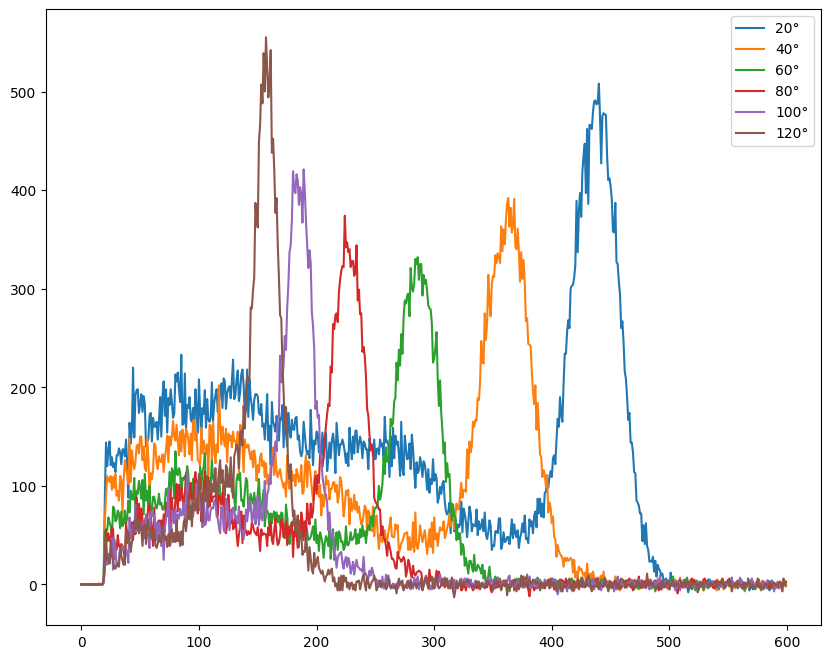

In [69]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,8))
xx = [i for i in range(600)]
for id in range(len(filelist)):
    filename = filelist[id]
    filebendiname = filebendilist[id]
    file = open('data/'+filename,'r')
    data = file.readlines()
    for i in range(len(data)):
        data[i]=int(data[i].strip('\n'))
    file.close()
    filebendi = open('data/'+filebendiname,'r')
    databendi = filebendi.readlines()
    for i in range(len(databendi)):
        databendi[i]=int(databendi[i].strip('\n'))
    data=np.array(data)
    databendi=np.array(databendi)
    datareal=data-databendi
    plt.plot(xx,datareal[0:600],label=labellist[id]+'°')
plt.legend()